# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')


** Read in the csv file as a dataframe called df **

In [3]:
df=pd.read_csv('911.csv')

** Check the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [6]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [8]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [9]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [10]:
df['reason']=df['title'].apply(lambda x: x.split(':')[0])
df['reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
5            EMS
6            EMS
7            EMS
8            EMS
9        Traffic
10       Traffic
11       Traffic
12       Traffic
13       Traffic
14       Traffic
15       Traffic
16           EMS
17           EMS
18           EMS
19       Traffic
20       Traffic
21       Traffic
22          Fire
23       Traffic
24       Traffic
25           EMS
26           EMS
27          Fire
28       Traffic
29       Traffic
          ...   
99462        EMS
99463        EMS
99464        EMS
99465        EMS
99466        EMS
99467        EMS
99468       Fire
99469       Fire
99470        EMS
99471        EMS
99472        EMS
99473        EMS
99474        EMS
99475    Traffic
99476        EMS
99477        EMS
99478    Traffic
99479        EMS
99480        EMS
99481        EMS
99482    Traffic
99483        EMS
99484       Fire
99485    Traffic
99486    Traffic
99487    Traffic
99488    Traffic
99489        E

** What is the most common Reason for a 911 call based off of this new column? **

In [11]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

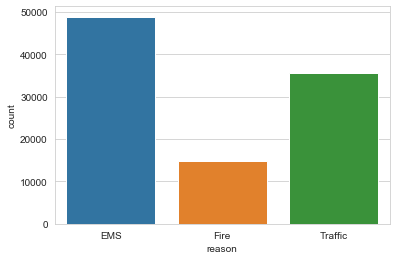

In [12]:
sns.countplot(x='reason',data=df)

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [13]:
type(df['timeStamp'].iloc[0])

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [14]:
df['timeStamp']=pd.to_datetime(df['timeStamp'],yearfirst=True)
time=df['timeStamp']
time

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
5       2015-12-10 17:40:01
6       2015-12-10 17:40:01
7       2015-12-10 17:40:01
8       2015-12-10 17:40:01
9       2015-12-10 17:40:01
10      2015-12-10 17:40:01
11      2015-12-10 17:40:02
12      2015-12-10 17:40:02
13      2015-12-10 17:40:02
14      2015-12-10 17:40:02
15      2015-12-10 17:40:02
16      2015-12-10 17:46:01
17      2015-12-10 17:47:01
18      2015-12-10 17:47:01
19      2015-12-10 17:47:02
20      2015-12-10 17:47:02
21      2015-12-10 17:57:02
22      2015-12-10 18:02:01
23      2015-12-10 18:02:02
24      2015-12-10 18:02:02
25      2015-12-10 18:06:25
26      2015-12-10 18:06:25
27      2015-12-10 18:06:25
28      2015-12-10 18:06:26
29      2015-12-10 18:11:01
                ...        
99462   2016-08-24 09:41:00
99463   2016-08-24 09:42:00
99464   2016-08-24 09:51:06
99465   2016-08-24 09:56:13
99466   2016-08-24 1

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [15]:
df['Hour']=df['timeStamp'].apply(lambda x: x.hour)
df['Month']=df['timeStamp'].apply(lambda x: x.month)
df['Day of Week']=df['timeStamp'].apply(lambda x: x.dayofweek)
df['Day of Week']


0        3
1        3
2        3
3        3
4        3
5        3
6        3
7        3
8        3
9        3
10       3
11       3
12       3
13       3
14       3
15       3
16       3
17       3
18       3
19       3
20       3
21       3
22       3
23       3
24       3
25       3
26       3
27       3
28       3
29       3
        ..
99462    2
99463    2
99464    2
99465    2
99466    2
99467    2
99468    2
99469    2
99470    2
99471    2
99472    2
99473    2
99474    2
99475    2
99476    2
99477    2
99478    2
99479    2
99480    2
99481    2
99482    2
99483    2
99484    2
99485    2
99486    2
99487    2
99488    2
99489    2
99490    2
99491    2
Name: Day of Week, Length: 99492, dtype: int64

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [16]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week']=df['Day of Week'].map(dmap)


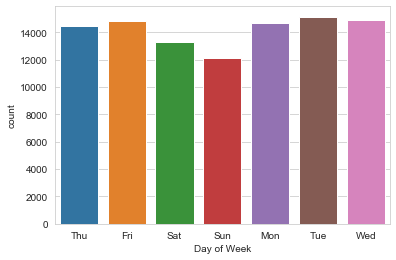

In [17]:
df['Day of Week'].head()
sns.countplot(x='Day of Week',data=df)

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

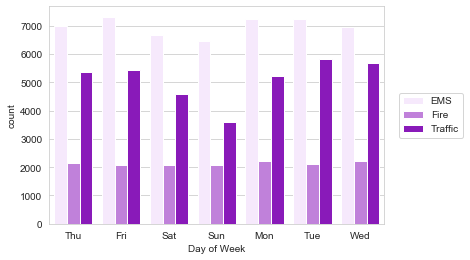

In [18]:
g=sns.countplot(x='Day of Week',hue='reason',data=df,color='darkviolet')
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)

**Now do the same for Month:**

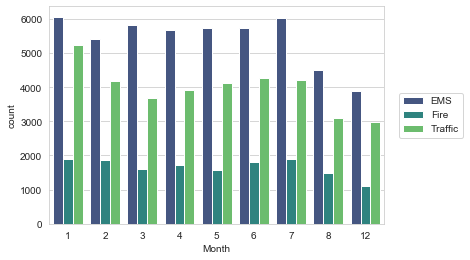

In [19]:
g=sns.countplot(x='Month',hue='reason',data=df,palette='viridis')
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [20]:
byMonth=df.groupby('Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


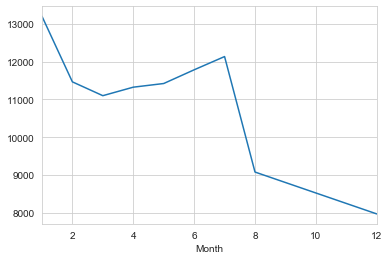

In [21]:
byMonth['title'].plot()

** Now create a simple plot off of the dataframe indicating the count of calls per month. **

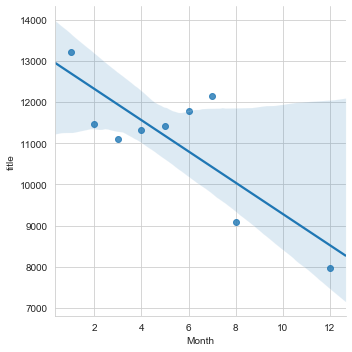

In [22]:

sns.lmplot(x='Month',y='title',data=byMonth.reset_index(),palette='viridis')

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

In [23]:
df['Date']=df['timeStamp'].apply(lambda x: x.date())
df['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
5        2015-12-10
6        2015-12-10
7        2015-12-10
8        2015-12-10
9        2015-12-10
10       2015-12-10
11       2015-12-10
12       2015-12-10
13       2015-12-10
14       2015-12-10
15       2015-12-10
16       2015-12-10
17       2015-12-10
18       2015-12-10
19       2015-12-10
20       2015-12-10
21       2015-12-10
22       2015-12-10
23       2015-12-10
24       2015-12-10
25       2015-12-10
26       2015-12-10
27       2015-12-10
28       2015-12-10
29       2015-12-10
            ...    
99462    2016-08-24
99463    2016-08-24
99464    2016-08-24
99465    2016-08-24
99466    2016-08-24
99467    2016-08-24
99468    2016-08-24
99469    2016-08-24
99470    2016-08-24
99471    2016-08-24
99472    2016-08-24
99473    2016-08-24
99474    2016-08-24
99475    2016-08-24
99476    2016-08-24
99477    2016-08-24
99478    2016-08-24
99479    2016-08-24
99480    2016-08-24


**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

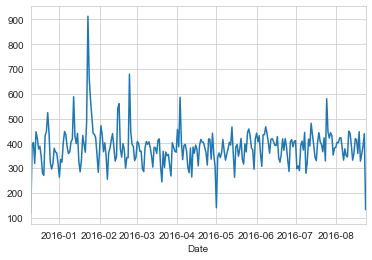

In [24]:
byDate=df.groupby('Date').count()
byDate['title'].plot()

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

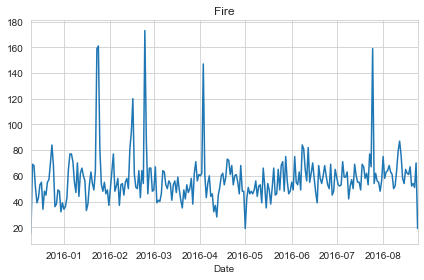

In [25]:
df[df['reason']=='Fire'].groupby('Date').count()['title'].plot()
plt.title('Fire')
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

Text(0.5, 1.0, 'EMS')

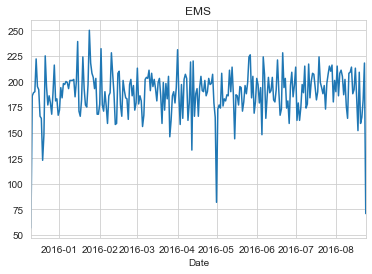

In [26]:
df[df['reason']=='EMS'].groupby('Date').count()['title'].plot()
plt.title('EMS')


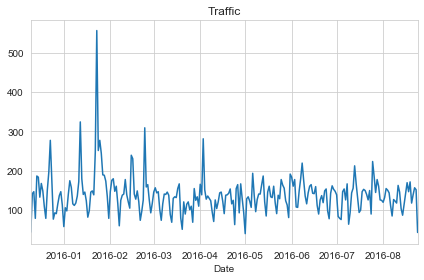

In [27]:
df[df['reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

In [36]:
new_df=df.groupby('Day of Week')['Hour'].value_counts().unstack()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

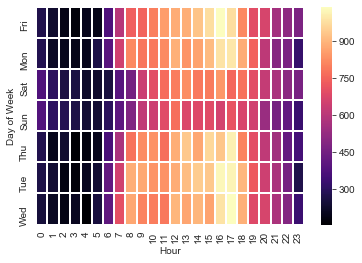

In [37]:
sns.heatmap(new_df,cmap='magma',lw=1)

** Now create a HeatMap using this new DataFrame. **

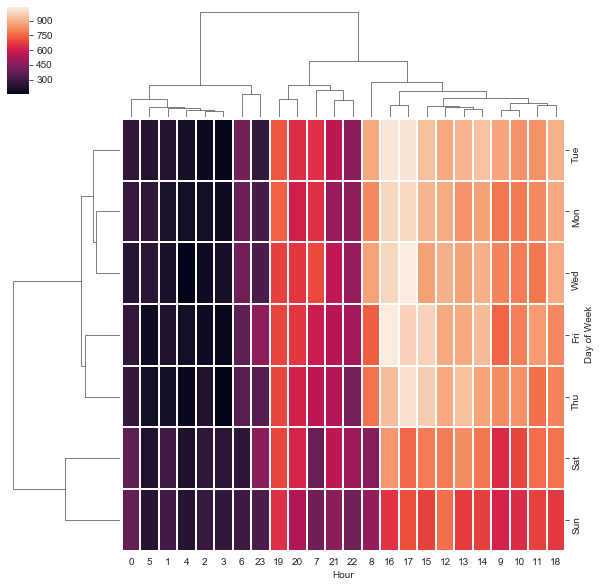

In [38]:
sns.clustermap(new_df, lw=1)

** Now create a clustermap using this DataFrame. **

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [40]:
new2_df=df.groupby('Day of Week')['Month'].value_counts().unstack()
new2_df


Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


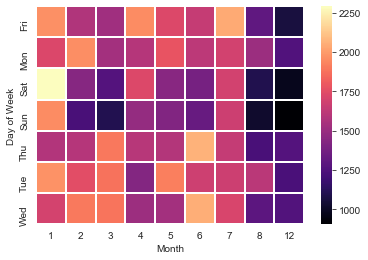

In [41]:
sns.heatmap(new2_df,cmap='magma',lw=1)

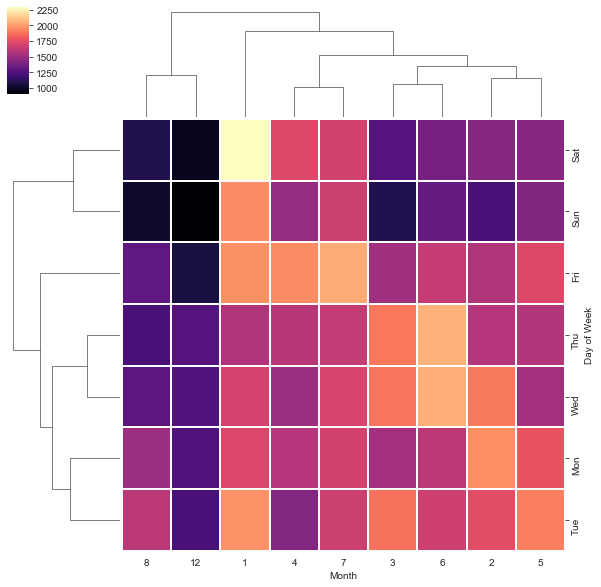

In [42]:
sns.clustermap(new2_df,cmap='magma',lw=1)

**Continue exploring the Data however you see fit!**
# Great Job!